In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
#loading datasets which is present inside tensorflow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
#viewing the shape of training data
x_train.shape

(60000, 28, 28)

In [5]:
#viewing image_1 from data
single_image = x_train[0]

In [6]:
#viewing the shape of image height, Width
single_image.shape

(28, 28)

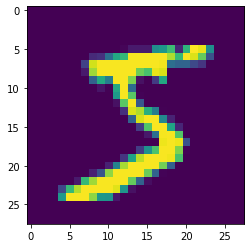

In [7]:
#viewing the first image
plt.imshow(single_image)

In [26]:
single_image.max()

255

In [27]:
single_image.min()

0

In [8]:
#viewing the array of images
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#importing libraries
from tensorflow.keras.utils import to_categorical

In [10]:
# categorizing the train data
y_cat_train = to_categorical(y_train, num_classes=10)

In [11]:
# categorizing the test data
y_cat_test = to_categorical(y_test, 10)

In [12]:
#
x_train = x_train/255
x_test = x_test/255

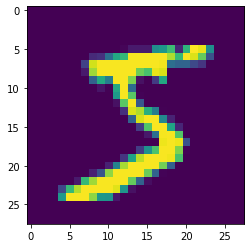

In [13]:
scaled_image = x_train[0]
plt.imshow(scaled_image)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 652us/sample - loss: 0.1437 - accuracy: 0.9574 - val_loss: 0.0567 - val_accuracy: 0.9811
Epoch 2/10
60000/60000 [==============================] - 38s 625us/sample - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 3/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0366 - val_accuracy: 0.9884
Epoch 4/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0371 - val_accuracy: 0.9882


In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.143710,0.957367,0.056678,0.9811
1,0.050541,0.984567,0.047496,0.9852
2,0.035533,0.988633,0.036592,0.9884
3,0.022275,0.992800,0.037098,0.9882


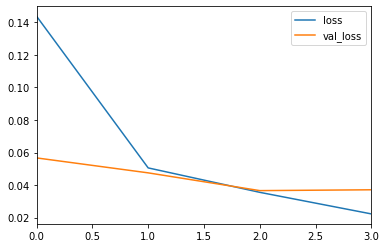

In [21]:
metrics[['loss','val_loss']].plot()

In [22]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.03709813781225239, 0.9882]

In [23]:
from sklearn.metrics import classification_report

In [24]:
y_pred = model.predict_classes(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

